In [1]:
import music21
import os
from music21 import *

In [2]:
music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 3","bin","MuseScore3.exe")))
music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 3","bin","MuseScore3.exe")))
music21.environment.set('lilypondPath', r'C:\Users\jeffs\lilypond-2.24.2\bin\lilypond.exe')

In [11]:
def XML_to_MIDI(file, output_folder,i):
    '''Conversion avec affichage du numero du fichier'''
    #Nom sans l'extention
    filename = os.path.splitext(os.path.basename(file))[0]
    score = music21.converter.parse(file,forceSource=True)
    midi_file = os.path.join(output_folder, f"{i}_{filename}.midi")
    midi_stream = score.write('midi', fp=midi_file)
    print(f"{i} : Fichier MIDI créé : {midi_file}"+20*" ",end='\r') 

def all_XML_to_MIDI(input_folder, output_folder,options):
    '''Converti tous les fichiers d'un folder en MIDI 
    sauf les numero de fichiers contenu dans options ( pour gérer les erreurs)'''
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for i,file in enumerate(os.listdir(input_folder)[:2]):
        if file.endswith(".xml") and i not in options:
            xml_file = os.path.join(input_folder, file)
            XML_to_MIDI(xml_file, output_folder,i)
    print(100*" ")                             
    print("Conversion terminee.")
                            

options={4,8,16,58,62,97,98,103,104,105,114,115,117,130,156,161} #pas de conversion mais erreurs
dossier_entree = 'data_xml'
dossier_sortie = 'data_midi'
all_XML_to_MIDI(dossier_entree, dossier_sortie,options)

                                                                                                    
Conversion terminee.


In [12]:
def open_midi(midi_path):
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    return midi.translate.midiFileToStream(mf)
def open_midi2(midi_path):
    return music21.converter.parse(midi_path,forceSource=True)
                                  
def open_all_midi(folder):
    '''Retourne la liste de tous les objets music21.bases.scores
    du folder contenant des fichiers midi'''
    midis=[]
    for i,file in enumerate(os.listdir(folder)):
        s=open_midi2(folder+"/"+file)
        s.insert(0, music21.metadata.Metadata())
        s.metadata.title=file.split("_")[1][:-5]
        midis.append(s)
        print(i+1, "fichiers MIDI charges"+20*" ",end='\r')
    print(100*" ") 
    print("Chargement termine")
    return midis

midis=open_all_midi("data_midi")


                                                                                                    
Chargement termine


In [13]:
print(str(len(midis))+ " fichiers midi convertis / "+str(len(os.listdir(dossier_entree)))+" fichiers XML disponibles")
print(str(len(options)) +" conversions aboutissant à une erreur + "+  str(len(os.listdir(dossier_entree))-len(midis)-len(options)) + " conversions oubliées ( à voir pourquoi)")

8 fichiers midi convertis / 171 fichiers XML disponibles
16 conversions aboutissant à une erreur + 147 conversions oubliées ( à voir pourquoi)


In [14]:
print(music21.environment)

<module 'music21.environment' from 'C:\\Users\\jeffs\\anaconda3\\envs\\envTorch\\lib\\site-packages\\music21\\environment.py'>


In [15]:
n=0

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x21cea647088>>

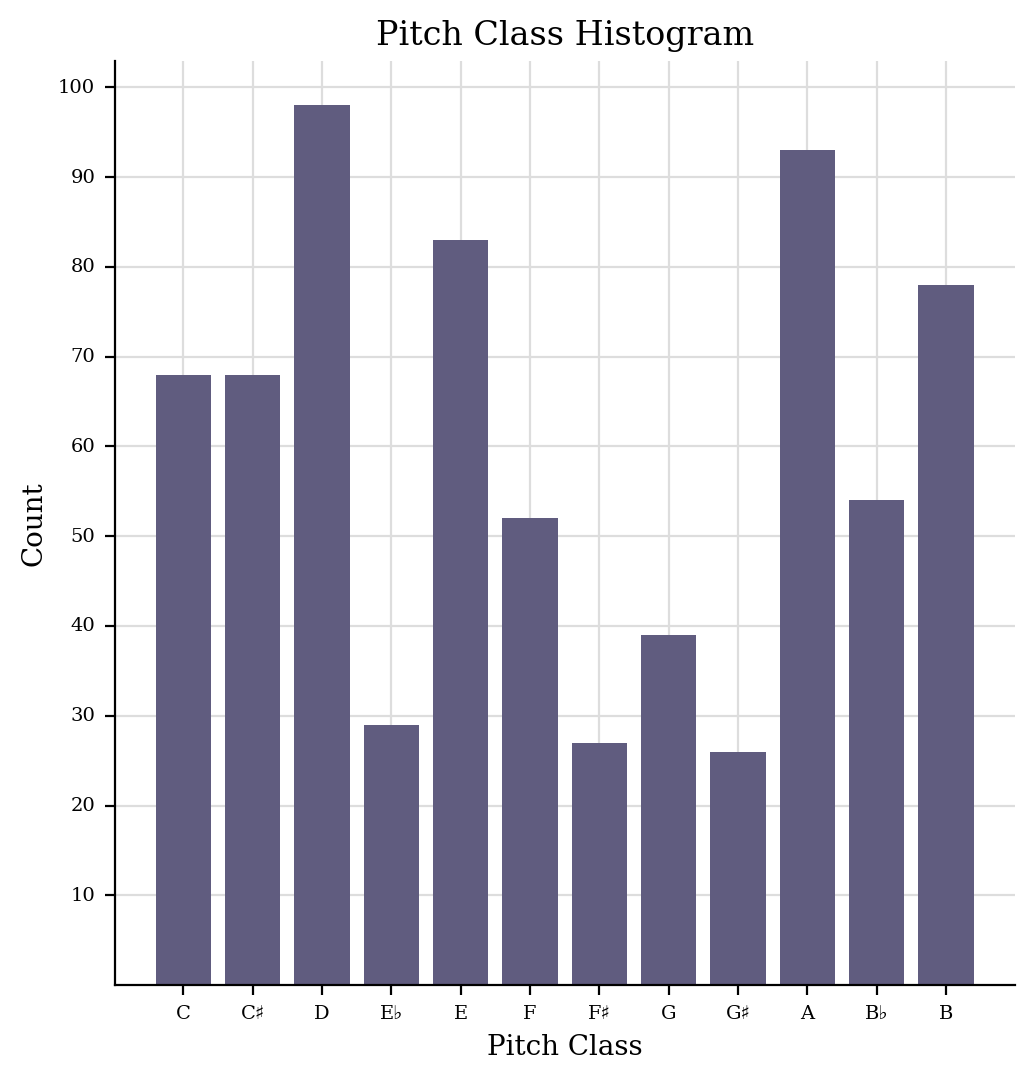

In [16]:
print(midis[n].metadata)
midis[n].plot('histogram', 'pitchClass', 'count')

In [17]:
midis[n].show('lily.pdf') #0 bizarre , #6 semble correcte
#print(midis[1].parts[0].duration)